Cho dữ liệu iris.xls
Yêu cầu: Thực hiện linenear regression để từ petalwidth => dự đoán petallength

1. Đọc dữ liệu, trực quan hóa dữ liệu.
2. Tạo X_train, X_test, y_train, y_test từ dữ liệu đọc được là 2 cột petalwidth (inputs) và petallength (outputs) với tỷ lệ dữ liệu test là 0.2
3. Áp dụng linrear regression
4. Vẽ hình. Nhận xét kết quả
5. Nếu petalwidth là 1.5 => petallength là bao nhiêu?

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import warnings
warnings.filterwarnings('ignore')

# <span style='color:yellow;'>1. Đọc dữ liệu, trực quan hóa dữ liệu.

In [9]:
iris = pd.read_excel('Data/Iris.xls')
iris

,sepallength,sepalwidth,petallength,petalwidth,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [10]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   iris         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
iris[['petallength', 'petalwidth']].describe()

,petallength,petalwidth
count,150.000000,150.000000
mean,3.758667,1.198667
std,1.764420,0.763161
min,1.000000,0.100000
25%,1.600000,0.300000
50%,4.350000,1.300000
75%,5.100000,1.800000
max,6.900000,2.500000


In [12]:
iris[['petallength', 'petalwidth']].corr()

,petallength,petalwidth
petallength,1.000000,0.962757
petalwidth,0.962757,1.000000


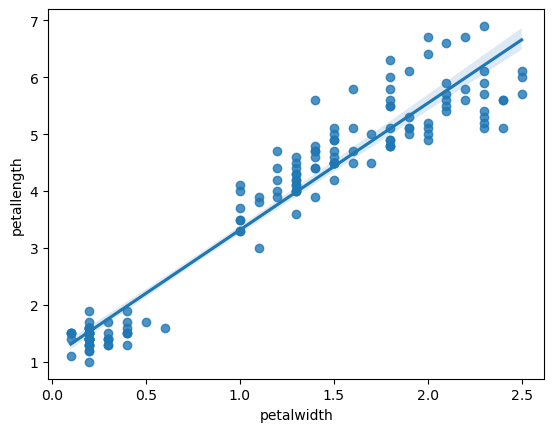

In [13]:
sbn.regplot(data=iris, x='petalwidth', y='petallength');

# <span style='color:yellow;'> 2. Tạo X_train, X_test, y_train, y_test từ dữ liệu đọc được là 2 cột petalwidth (inputs) và petallength (outputs) với tỷ lệ dữ liệu test là 0.2

In [16]:
x = iris[['petalwidth']]
y = iris['petallength']

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# <span style='color:yellow;'> 3. Áp dụng linrear regression

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [68]:
linreg_simp = LinearRegression().fit(x_train, y_train)

b1 = linreg_simp.coef_[0]
b0 = linreg_simp.intercept_

print(f'Intercept = {b0}')
print(f'Coefficient = {b1}\n')

print(f'petallength_predict = {b0} + {b1}*petalwidth\n')

y_predict = linreg_simp.predict(x_test)

print(f'R^2 score on whole set: {linreg_simp.score(x, y)}')
print(f'R^2 score on train set: {linreg_simp.score(x_train, y_train)}')
print(f'R^2 score on test set: {linreg_simp.score(x_test, y_test)}')
print()
print(f'MSE on test set = {mean_squared_error(y_test, y_predict)}')
print(f'MAE on test set = {mean_absolute_error(y_test, y_predict)}')

Intercept = 1.1412129222820484
Coefficient = 2.191206903735665

petallength_predict = 1.1412129222820484 + 2.191206903735665*petalwidth

R^2 score on whole set: 0.9266496275421282
R^2 score on train set: 0.9262689455033826
R^2 score on test set: 0.9269002469365402

MSE on test set = 0.2168991506314625
MAE on test set = 0.3615536183037887


# <span style='color:yellow;'> 4. Vẽ hình. Nhận xét kết quả

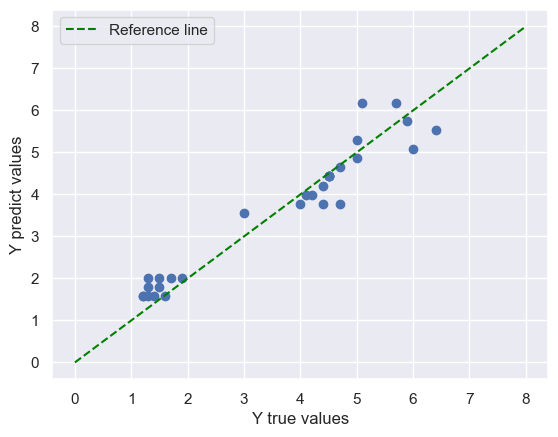

In [34]:
sbn.set_theme(style='darkgrid')

plt.scatter(y_test, y_predict)
plt.plot([0,8], [0,8], '--', color='green', label='Reference line')
plt.xlabel('Y true values')
plt.ylabel('Y predict values')
plt.legend()
plt.show()

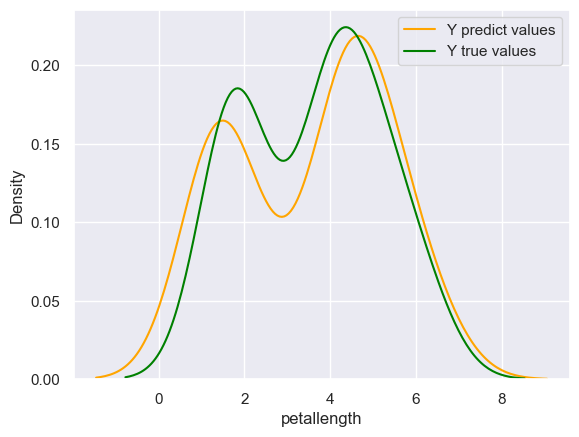

In [36]:
sbn.kdeplot(y_test, color='orange', label='Y predict values')
sbn.kdeplot(y_predict, color='green', label='Y true values')
plt.legend()
plt.show()

## The result of the model is good, R^2 scores on all datasets are all > 0.9
## The visualization plots show the according results

# <span style='color:yellow;'> 5. Nếu petalwidth là 1.5 => petallength là bao nhiêu?

In [59]:
x_new = np.array([1.5]).reshape(-1,1)
print(f'If petalwidth = 1.5 then petallength_predict = {linreg_simp.predict(x_new)[0]}')

If petalwidth = 1.5 then petallength_predict = 4.428023277885546
